<a href="https://colab.research.google.com/github/adityayadav4507/100Days_of_ML/blob/main/66_Day_AdaBoost_Hyperparameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_circles

In [57]:
X,y = make_circles(n_samples=500,factor=0.1 ,noise=0.3,random_state=42)

In [58]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,

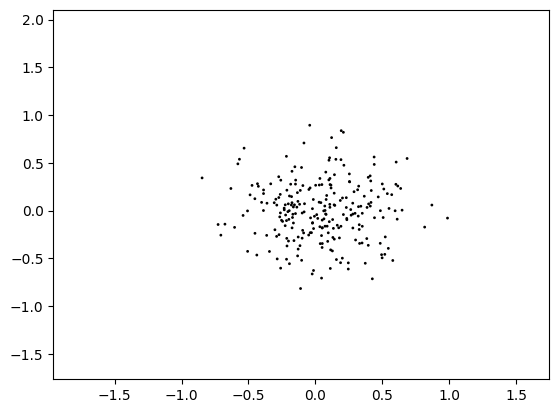

In [59]:
plt.scatter(X[:,0],X[:,1],y,c=y,cmap='bwr',edgecolor='k')

In [60]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [61]:
adc=AdaBoostClassifier()

np.mean(cross_val_score(adc,X,y,scoring='accuracy',cv=10))

np.float64(0.8540000000000001)

In [62]:
adc.fit(X,y)

AdaBoostClassifier()

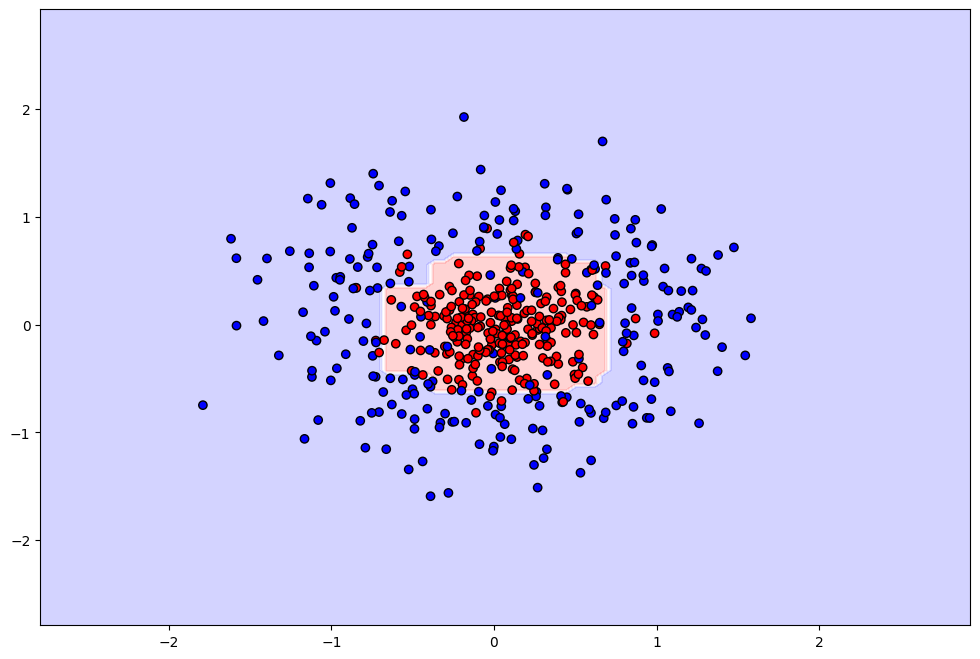

In [63]:
def plot_decioin(clf):
  plt.figure(figsize=(12,8))
  x_range = np.linspace(X.min()-1,X.max()+1,100)
  xx1,xx2 = np.meshgrid(x_range,x_range)
  y_hat= clf.predict(np.c_[xx1.ravel(),xx2.ravel()])
  y_hat=y_hat.reshape(xx1.shape)
  plt.contourf(xx1,xx2,y_hat,alpha=0.2,cmap='bwr')
  plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr',edgecolor='k')
  plt.show()


plot_decioin(adc)



```
 take only one decision tree
```



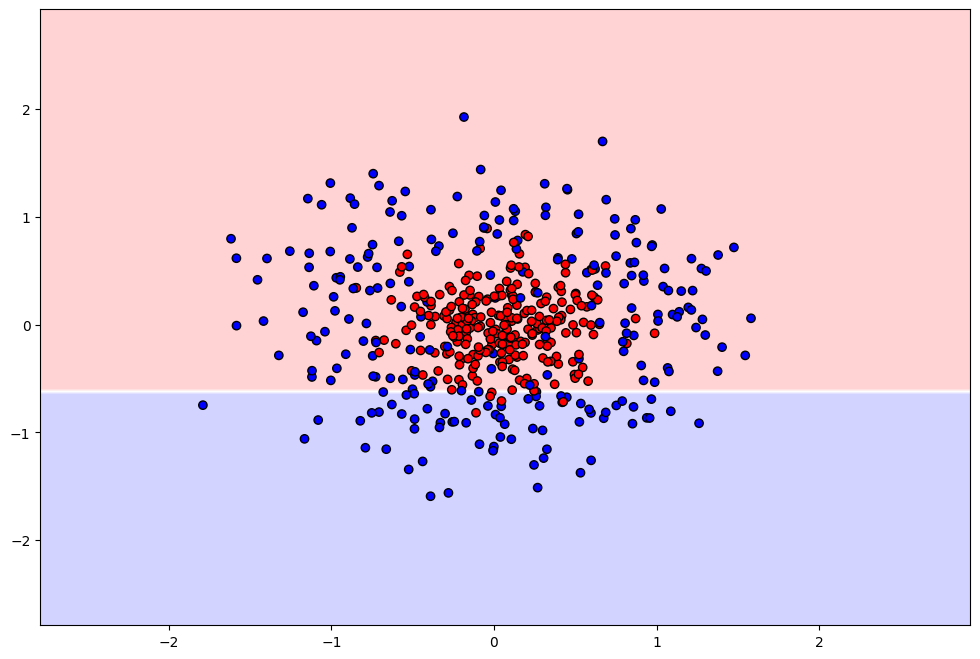

In [64]:
adc=AdaBoostClassifier(n_estimators=1)
adc.fit(X,y)
plot_decioin(adc)

# underfitting

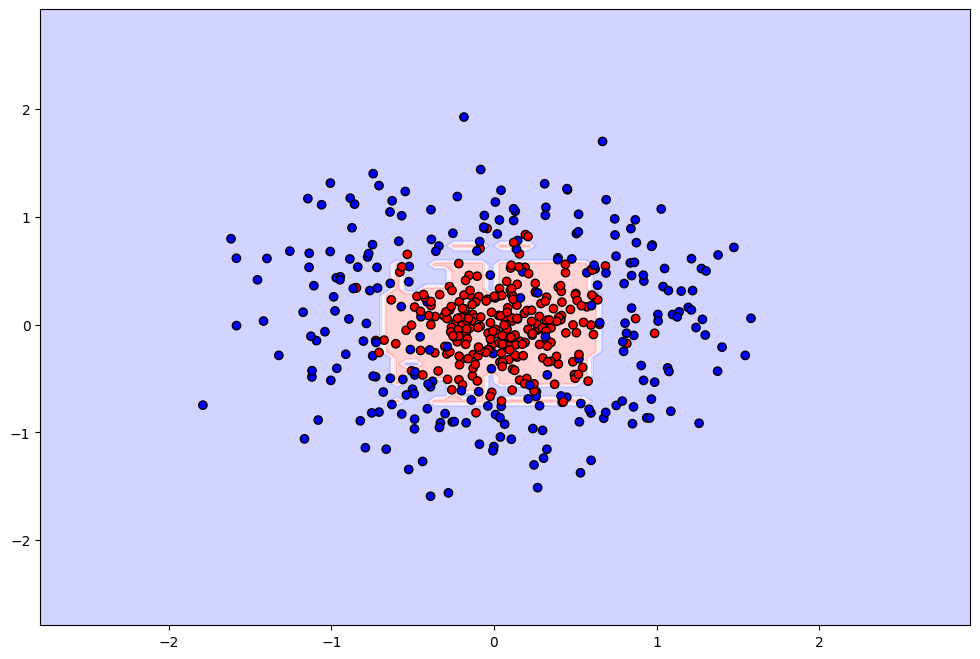

In [68]:
adc=AdaBoostClassifier(n_estimators=10000)
adc.fit(X,y)
plot_decioin(adc) # overfitting

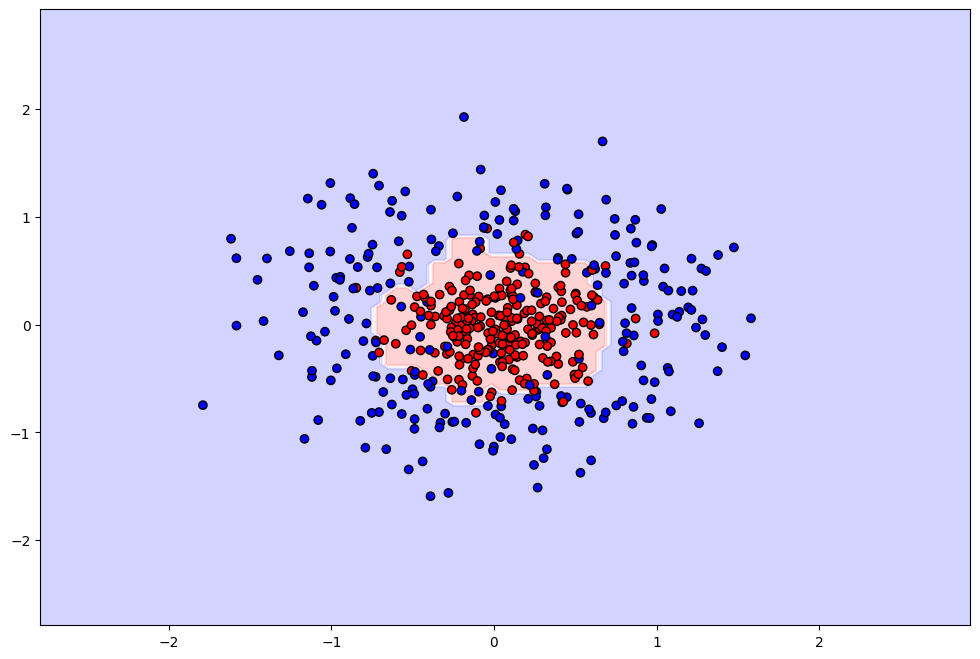

In [69]:
adc=AdaBoostClassifier(n_estimators=10000, learning_rate=0.2)
adc.fit(X,y)
plot_decioin(adc) # lr reduce the overfitting